In [1]:
!pip install statsmodels --upgrade

Please upload AAPL Excel file


Saving HistoricalPrices-_1_.xlsx to HistoricalPrices-_1_ (1).xlsx
Please upload MSFT Excel file


Saving HistoricalPrices-_2_.xlsx to HistoricalPrices-_2_ (1).xlsx

AAPL DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
MSFT DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
Please enter the column name containing closing prices:  Close

Unit Root Tests for AAPL:
ADF Test:
ADF Statistic: -1.1888
p-value: 0.6784
Critical Values: {'1%': -3.4514162625887037, '5%': -2.8708187088091406, '10%': -2.5717136883095675}

KPSS Test:
KPSS Statistic: 2.2480
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Unit Root Tests for MSFT:
ADF Test:
ADF Statistic: -2.1982
p-value: 0.2069
Critical Values: {'1%': -3.4514162625887037, '5%': -2.8708187088091406, '10%': -2.5717136883095675}

KPSS Test:
KPSS Statistic: 1.0152
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-6-bf8461eead99>:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-6-bf8461eead99>:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._


Best ARMA model for AAPL:
Order: (2, 0, 3)
AIC: 1580.97


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of


Best ARMA model for MSFT:
Order: (3, 0, 3)
AIC: 1946.18


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Johansen Cointegration Test:
Trace statistic: [11.21738271  3.72948972]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
r = 0: No cointegration at 95% confidence level
r = 1: No cointegration at 95% confidence level


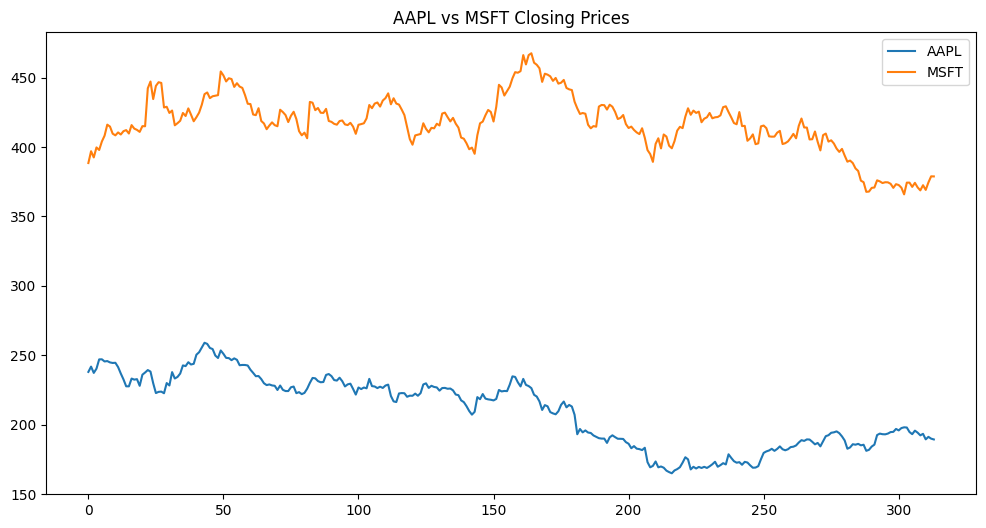

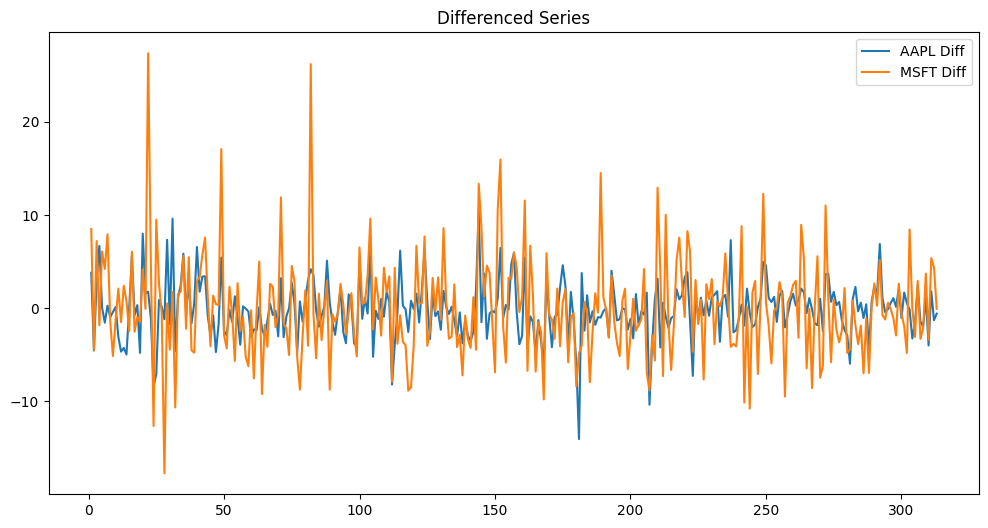

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload AAPL Excel file")
aapl_upload = files.upload()
aapl_filename = list(aapl_upload.keys())[0]
aapl_df = pd.read_excel(aapl_filename)

print("Please upload MSFT Excel file")
msft_upload = files.upload()
msft_filename = list(msft_upload.keys())[0]
msft_df = pd.read_excel(msft_filename)

# Print available columns
print("\nAAPL DataFrame columns:", list(aapl_df.columns))
print("MSFT DataFrame columns:", list(msft_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices using user-specified column name
try:
    aapl_close = aapl_df[close_column]
    msft_close = msft_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure both series have the same length
min_length = min(len(aapl_close), len(msft_close))
aapl_close = aapl_close[:min_length]
msft_close = msft_close[:min_length]

# Function for unit root tests
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')

# Perform unit root tests
unit_root_tests(aapl_close, "AAPL")
unit_root_tests(msft_close, "MSFT")

# Difference the series if non-stationary
aapl_diff = aapl_close.diff().dropna()
msft_diff = msft_close.diff().dropna()

# Function to find best ARMA model (using ARIMA with d=0)
def find_best_arma(series, name, max_p=3, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(series, order=(p, 0, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, 0, q)
            except:
                continue

    print(f"\nBest ARMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")

    best_model = ARIMA(series, order=best_order).fit()
    return best_model

# Fit ARMA models
aapl_arma = find_best_arma(aapl_diff, "AAPL")
msft_arma = find_best_arma(msft_diff, "MSFT")

# Cointegration test
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")

    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:  # 95% critical value
            print(f"r = {i}: Cointegration exists at 95% confidence level")
        else:
            print(f"r = {i}: No cointegration at 95% confidence level")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'AAPL': aapl_close,
    'MSFT': msft_close
}).dropna()

# Run cointegration test
cointegration_test(coint_df)

# Plot the series
plt.figure(figsize=(12,6))
plt.plot(aapl_close, label='AAPL')
plt.plot(msft_close, label='MSFT')
plt.title('AAPL vs MSFT Closing Prices')
plt.legend()
plt.show()

# Plot the differenced series
plt.figure(figsize=(12,6))
plt.plot(aapl_diff, label='AAPL Diff')
plt.plot(msft_diff, label='MSFT Diff')
plt.title('Differenced Series')
plt.legend()
plt.show()